In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score

### 1.Problem Solving

In [2]:
# indepndent variables >> GRE Score,TOEFL Score,SOP,LOR,CGPA

# dependent Var >>Chance_of_Admit

### 2.Data Gathering

In [3]:
admin_df=pd.read_csv('adm_data.csv')
admin_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
admin_df1=admin_df.drop(['Serial No.','Research'],axis=1)
admin_df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82
396,325,107,3,3.0,3.5,9.11,0.84
397,330,116,4,5.0,4.5,9.45,0.91
398,312,103,3,3.5,4.0,8.78,0.67


### 3.EDA

In [5]:
admin_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 22.0 KB


In [6]:
admin_df1.shape

(400, 7)

In [7]:
admin_df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.970000


In [8]:
admin_df1.columns=['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']
admin_df1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82
396,325,107,3,3.0,3.5,9.11,0.84
397,330,116,4,5.0,4.5,9.45,0.91
398,312,103,3,3.5,4.0,8.78,0.67


#### 3.1 GRE_Score

In [9]:
admin_df1['GRE_Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [10]:
admin_df1['GRE_Score'].nunique()

49

<AxesSubplot: xlabel='GRE_Score', ylabel='Count'>

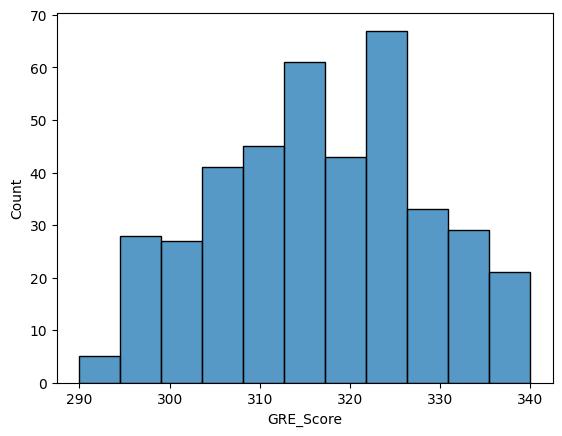

In [11]:
sns.histplot(admin_df1['GRE_Score'])

<AxesSubplot: xlabel='GRE_Score', ylabel='Density'>

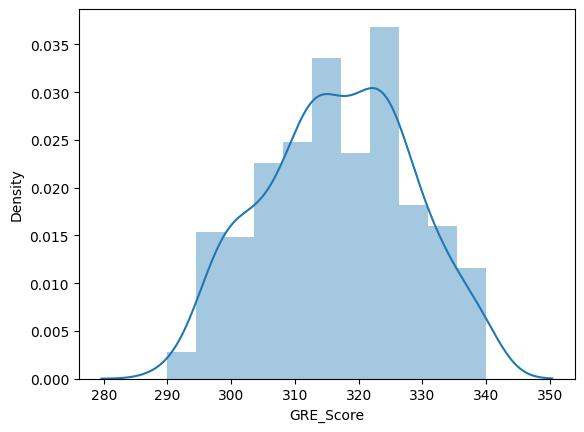

In [12]:
sns.distplot(admin_df1['GRE_Score'])

<AxesSubplot: xlabel='GRE_Score', ylabel='Density'>

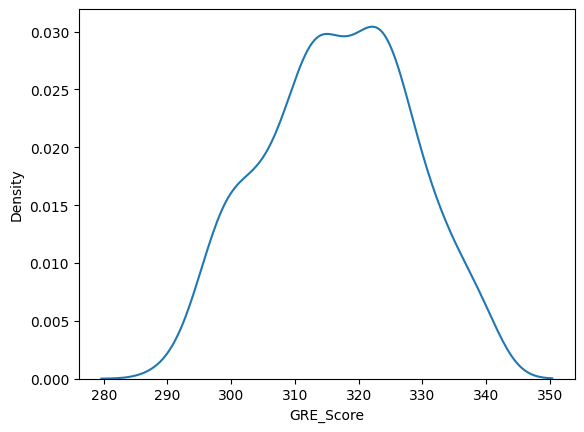

In [13]:
sns.kdeplot(admin_df1['GRE_Score'])

<AxesSubplot: xlabel='GRE_Score', ylabel='count'>

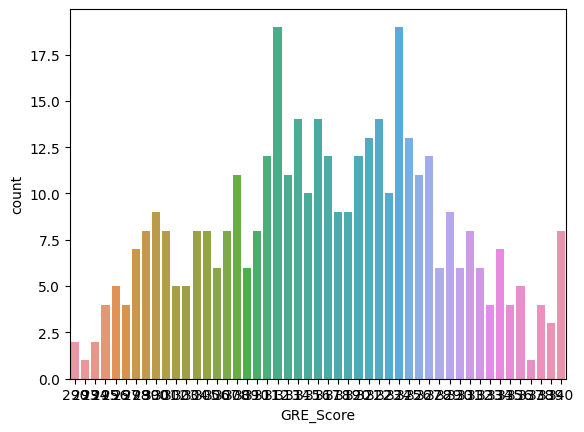

In [14]:
sns.countplot(x=admin_df1['GRE_Score'])

#### 3.2 TOEFL_Score

In [15]:
admin_df1['TOEFL_Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

In [16]:
admin_df1['TOEFL_Score'].nunique()

29

<AxesSubplot: xlabel='TOEFL_Score', ylabel='Count'>

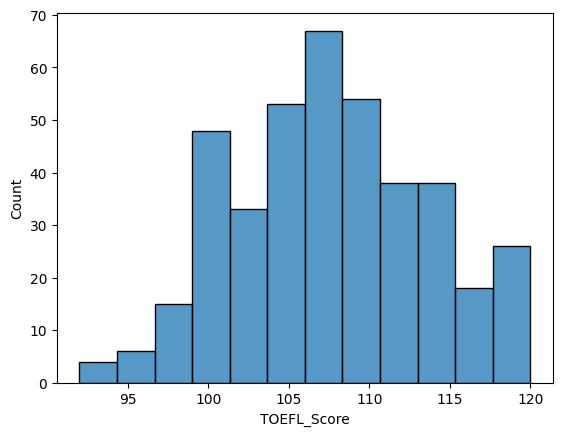

In [17]:
sns.histplot(admin_df1['TOEFL_Score'])

<AxesSubplot: xlabel='TOEFL_Score', ylabel='Density'>

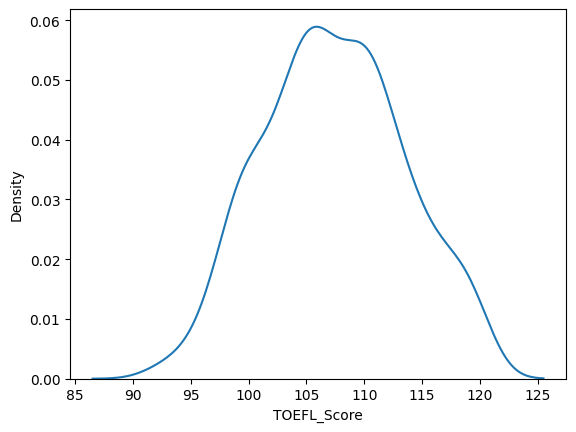

In [18]:
sns.kdeplot(admin_df1['TOEFL_Score'])

#### 3.3 University_Rating

In [19]:
admin_df1.head(2)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76


In [20]:
admin_df1['University_Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [21]:
admin_df1['University_Rating'].nunique()

5

<AxesSubplot: xlabel='University_Rating', ylabel='Count'>

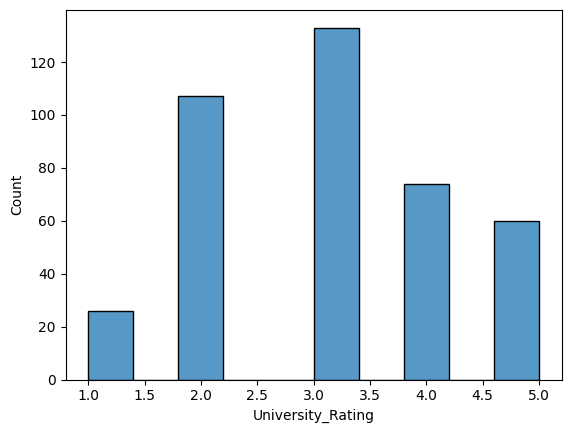

In [22]:
sns.histplot(admin_df1['University_Rating'])

<AxesSubplot: xlabel='University_Rating', ylabel='Density'>

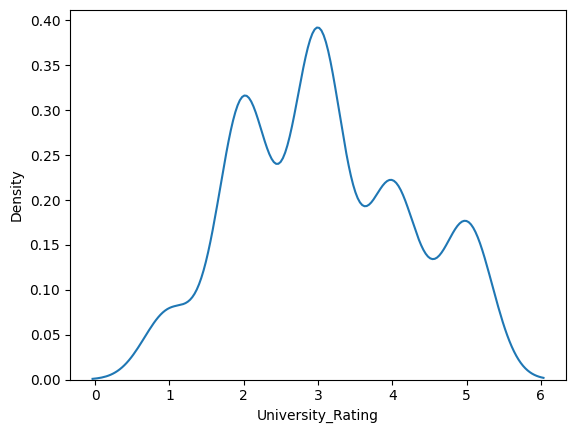

In [23]:
sns.kdeplot(admin_df1['University_Rating'])

<AxesSubplot: xlabel='University_Rating', ylabel='count'>

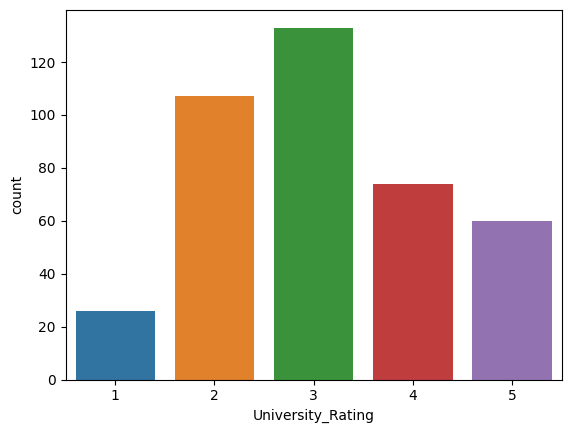

In [24]:
sns.countplot(x=admin_df1['University_Rating'])

#### 3.4 SOP

In [25]:
admin_df1['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [26]:
admin_df1['SOP'].nunique()

9

<AxesSubplot: xlabel='SOP', ylabel='Count'>

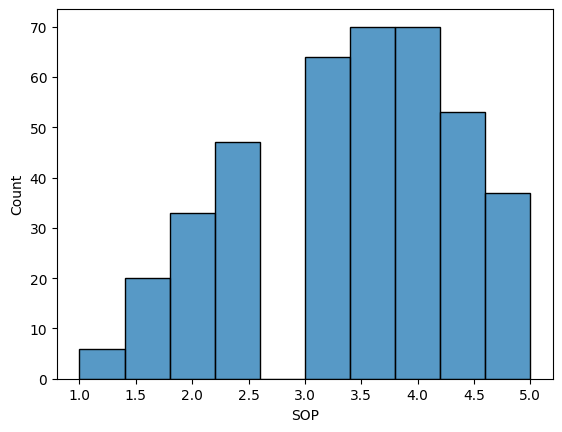

In [27]:
sns.histplot(admin_df1['SOP'])

<AxesSubplot: xlabel='SOP', ylabel='Density'>

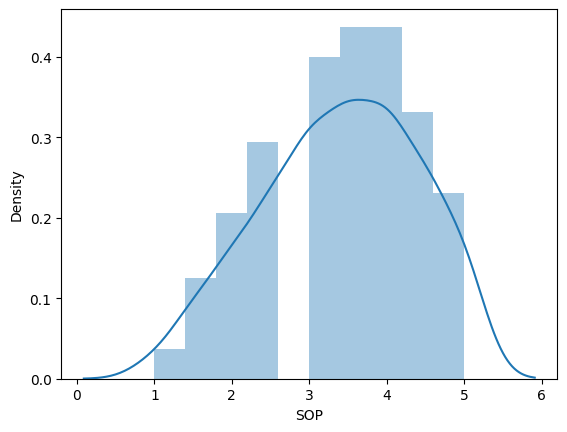

In [28]:
sns.distplot(admin_df1['SOP'])

<AxesSubplot: xlabel='SOP', ylabel='Density'>

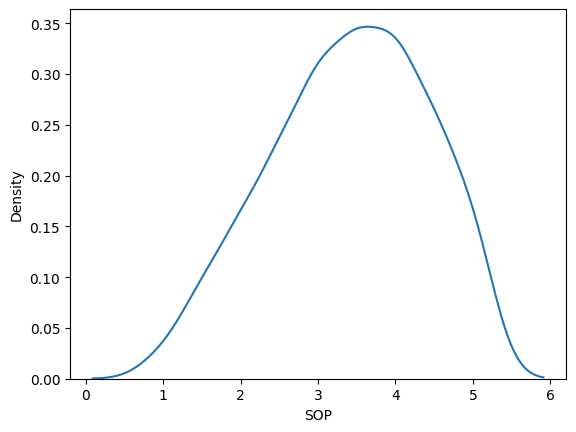

In [29]:
sns.kdeplot(admin_df1['SOP'])

#### 3.5 LOR

In [30]:
admin_df1['LOR'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [31]:
admin_df1['LOR'].nunique()

9

<AxesSubplot: xlabel='LOR', ylabel='Density'>

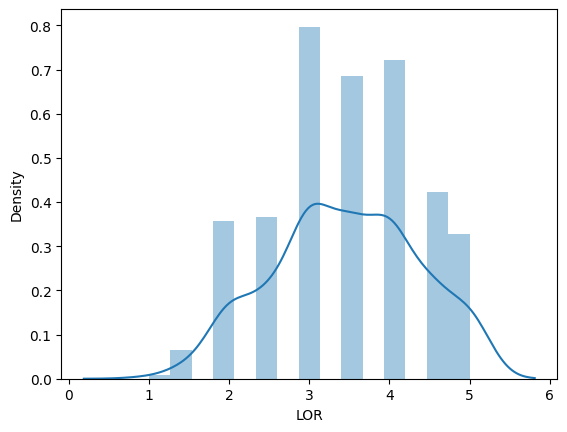

In [32]:
sns.distplot(admin_df1['LOR'])

#### 3.6 Chance_of_Admit

In [33]:
admin_df1['Chance_of_Admit'].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

In [34]:
admin_df1['Chance_of_Admit'].nunique()

60

<AxesSubplot: xlabel='Chance_of_Admit', ylabel='Density'>

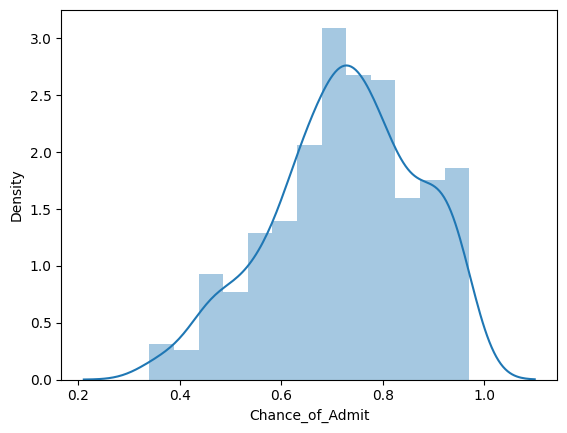

In [35]:
sns.distplot(admin_df1['Chance_of_Admit'])

###  4.Feature Engineering

### 5. Feature Selection

#### 1.Linearity

In [36]:
admin_df1.cov()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
GRE_Score,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,1.313271
TOEFL_Score,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,0.685179
University_Rating,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.116009
SOP,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.097028
LOR,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.085834
CGPA,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.074265
Chance_of_Admit,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.020337


In [37]:
admin_df1.var()

GRE_Score            131.644555
TOEFL_Score           36.838997
University_Rating      1.308114
SOP                    1.013784
LOR                    0.807262
CGPA                   0.355594
Chance_of_Admit        0.020337
dtype: float64

In [38]:
cor=admin_df1.corr()
cor

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
GRE_Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.802610
TOEFL_Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.791594
University_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.873289
Chance_of_Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,1.000000


<AxesSubplot: >

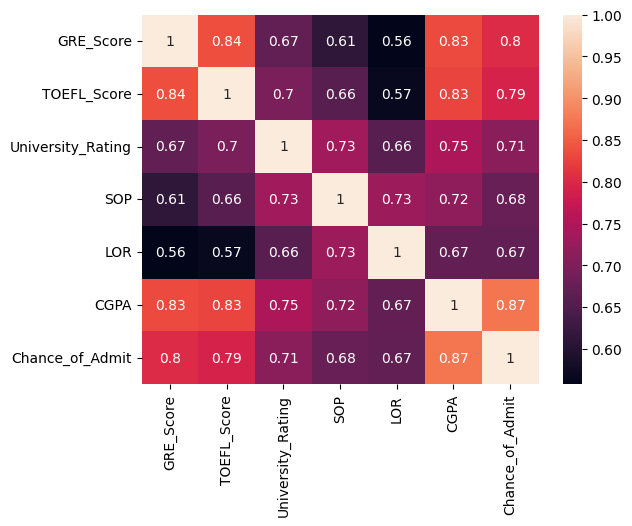

In [39]:
sns.heatmap(cor,annot=True)

In [40]:
cor[['CGPA']].T

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
CGPA,0.83306,0.828417,0.746479,0.718144,0.670211,1.0,0.873289


<AxesSubplot: >

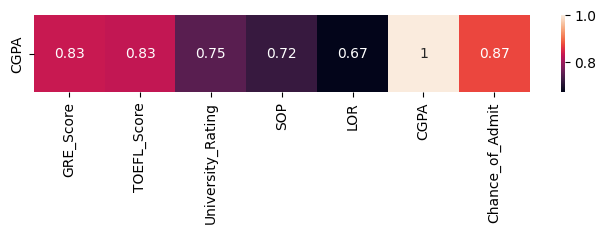

In [41]:
plt.figure(figsize=(8,1))
sns.heatmap(cor[['CGPA']].T,annot=True)

<AxesSubplot: xlabel='GRE_Score', ylabel='CGPA'>

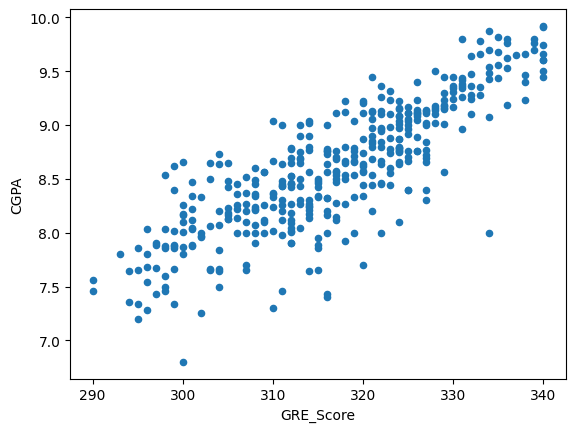

In [42]:
admin_df1.plot(x='GRE_Score',y='CGPA',kind= 'scatter')

<AxesSubplot: xlabel='LOR', ylabel='CGPA'>

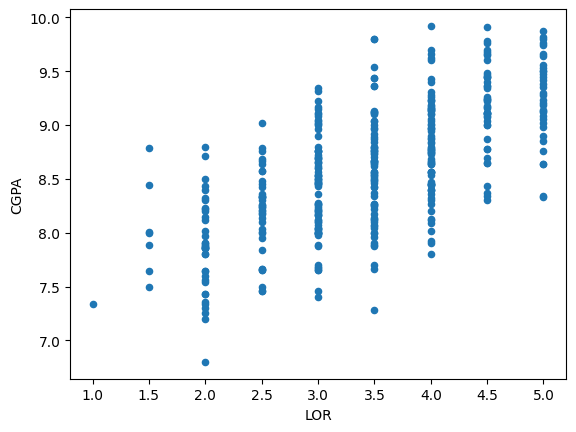

In [43]:
admin_df1.plot(x='LOR',y='CGPA',kind= 'scatter')

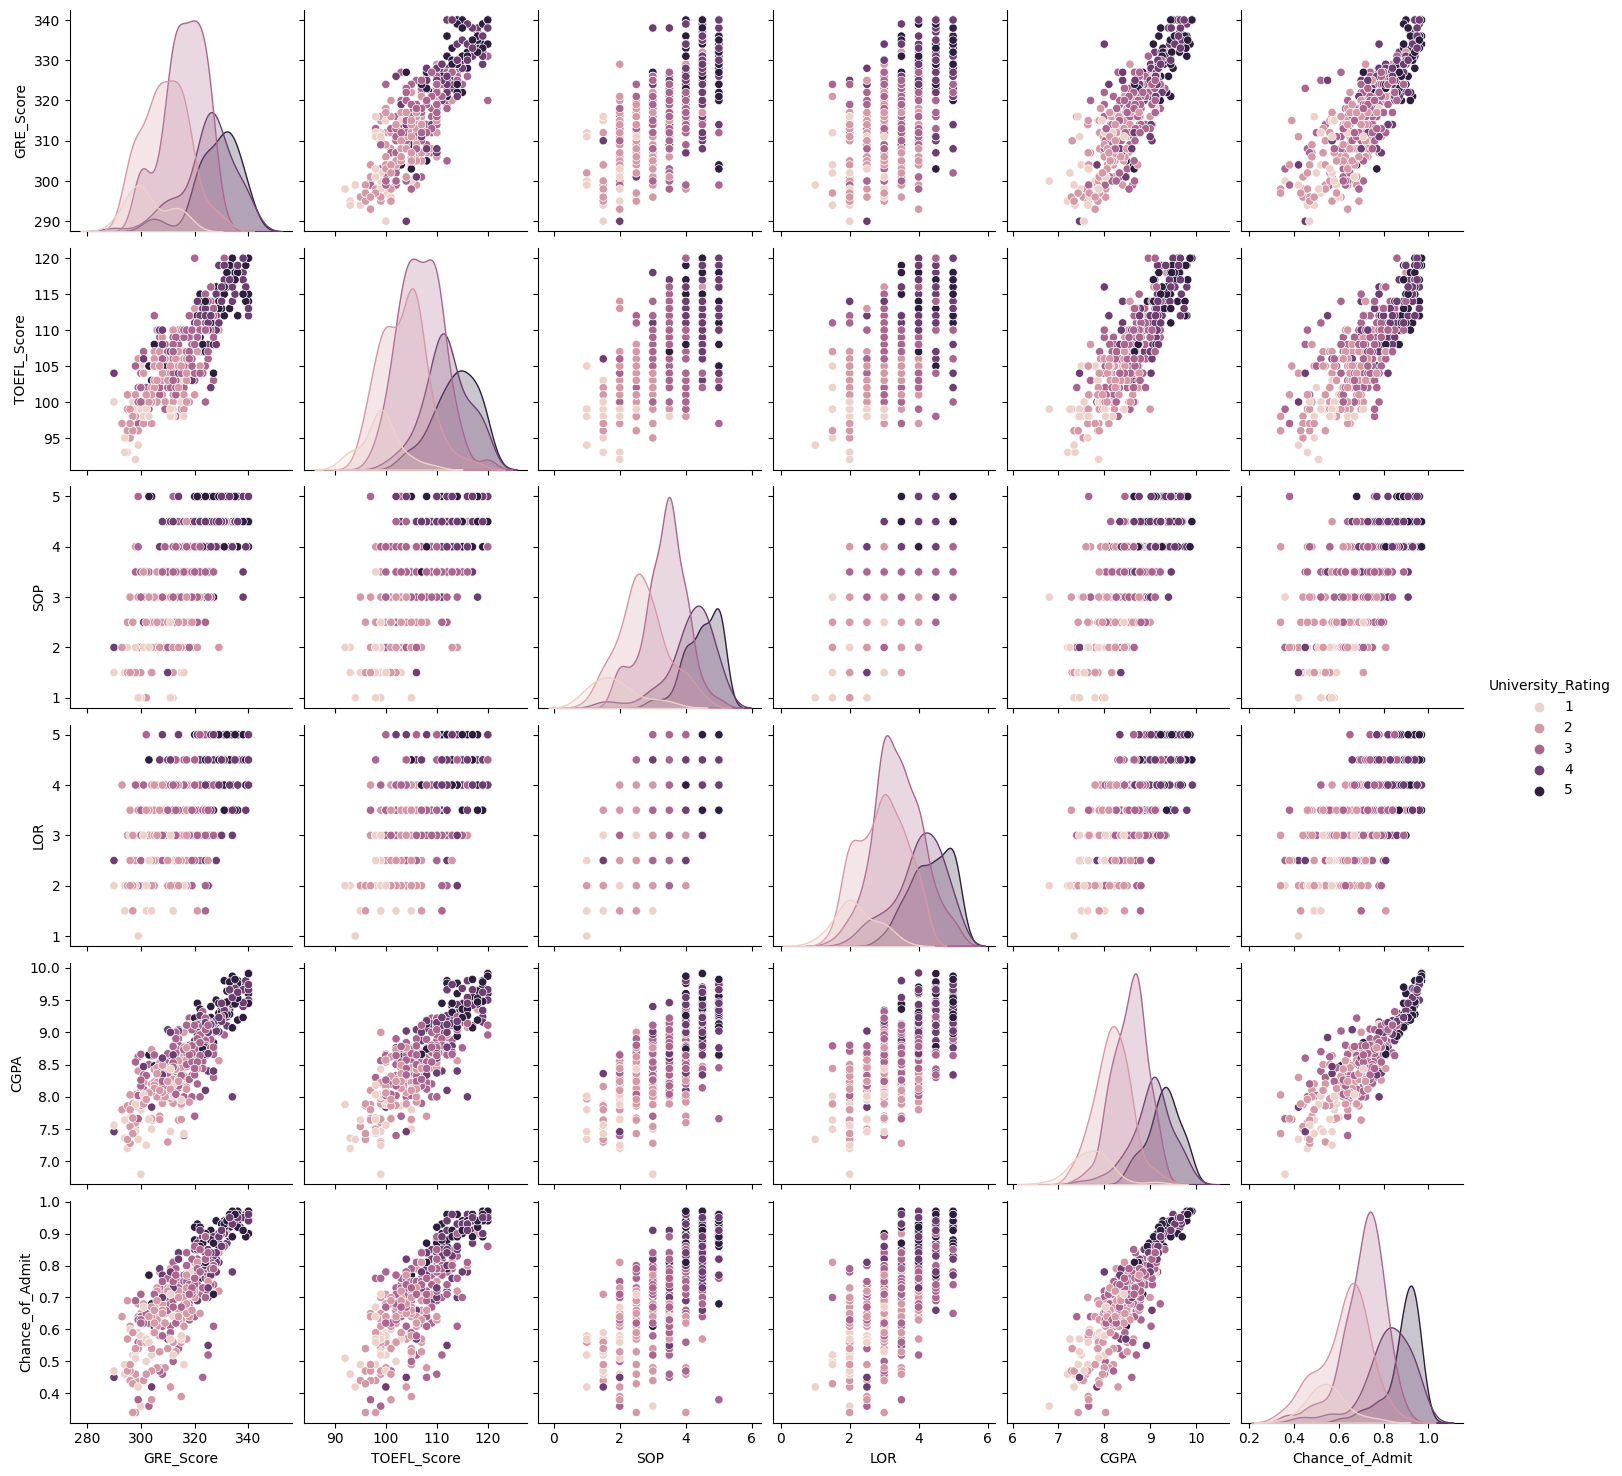

In [44]:
sns.pairplot(admin_df1,hue='University_Rating')

#### 2.No Multicolinearity

In [87]:
x1=admin_df1.drop('Chance_of_Admit',axis=1)
x1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


In [88]:
x1.shape[1]

6

In [89]:
vif_list = []
for i in  range(0,x1.shape[1]):
    vif = variance_inflation_factor(x1.to_numpy(), i)   # exog : {ndarray, DataFrame},exog_idx 
    vif_list.append(vif)
    
    print(f'VIF for {x1.columns[i]}:', vif)

VIF for GRE_Score: 1437.2389366483428
VIF for TOEFL_Score: 1347.4089985805142
VIF for University_Rating: 21.56143848099932
VIF for SOP: 37.53604779918011
VIF for LOR: 38.372679331219615
VIF for CGPA: 1075.1977331115866


In [90]:
vif_df = pd.DataFrame()
vif_df['Features'] = x1.columns
vif_df['VIF'] = vif_list

In [91]:
vif_df

,Features,VIF
0,GRE_Score,1437.238937
1,TOEFL_Score,1347.408999
2,University_Rating,21.561438
3,SOP,37.536048
4,LOR,38.372679
5,CGPA,1075.197733


<AxesSubplot: >

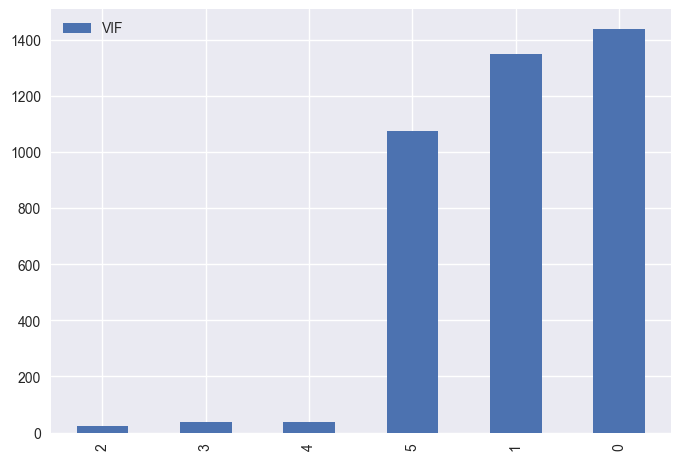

In [92]:
vif_df.sort_values('VIF').plot(kind='bar')

<AxesSubplot: >

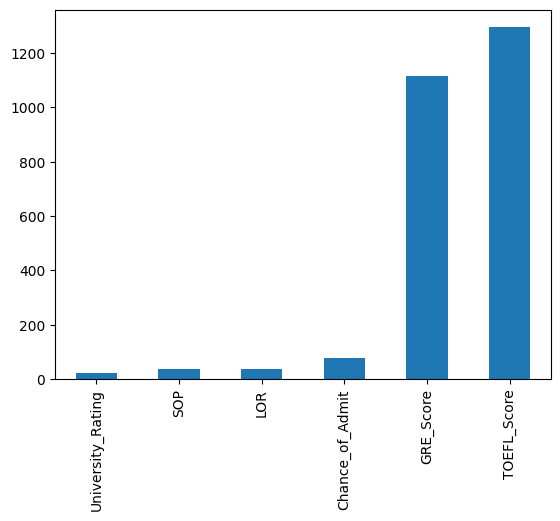

In [51]:
s1=pd.Series(vif_list,index=x1.columns)
s1.sort_values().plot(kind= 'bar')
# admin_df1.plot()

### 6.Model Treaining

In [93]:
x = x1   
y=admin_df1['Chance_of_Admit']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance_of_Admit, Length: 400, dtype: float64

#### splitting dataset into train and test

In [94]:
admin_df1.shape


(400, 7)

#### train test split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)
x_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA
93,301,97,2,3.0,3.0,7.88
23,334,119,5,5.0,4.5,9.70
299,305,112,3,3.0,3.5,8.65
13,307,109,3,4.0,3.0,8.00
90,318,106,2,4.0,4.0,7.92
...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37
72,321,111,5,5.0,5.0,9.45
396,325,107,3,3.0,3.5,9.11
235,326,111,5,4.5,4.0,9.23


In [96]:
x_test.shape

(80, 6)

In [97]:
y_test.shape

(80,)

In [98]:
y_train.shape

(320,)

### Instantiating Linear Regression Model

In [99]:
lin_reg= LinearRegression()
lin_reg

LinearRegression()

### Model Training

In [100]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [101]:
lin_reg.coef_   # m values

array([ 0.0020334 ,  0.00295838,  0.00845054, -0.00408227,  0.02193747,
        0.11828966])

In [102]:
lin_reg.intercept_

-1.340611912111282

### Model Evaluation

In [103]:
y_pred_test = lin_reg.predict(x_test)
y_pred_test

array([0.73591846, 0.6726337 , 0.78120244, 0.77485909, 0.84670937,
       0.65288724, 0.6461397 , 0.55675474, 0.50078849, 0.93686983,
       0.80677053, 0.9357857 , 0.88051168, 0.66088161, 0.71898461,
       0.69666668, 0.81113788, 0.86514375, 0.48275351, 0.70009014,
       0.674754  , 0.77151653, 0.82916335, 0.91798148, 0.64278285,
       0.57151258, 0.71406532, 0.6944866 , 0.90445298, 0.63899314,
       0.95257925, 0.64829553, 0.81225496, 0.77631577, 0.70540246,
       0.636121  , 0.40673573, 0.66470646, 0.90352853, 0.77821779,
       0.86489327, 0.68497811, 0.88220324, 0.62861314, 0.97984035,
       0.72935703, 0.72675906, 0.8214112 , 0.64430374, 0.67610272,
       0.80302042, 0.56555883, 0.79974711, 0.7472147 , 0.71970458,
       0.89041331, 0.47721979, 0.51966744, 0.78332649, 0.78029689,
       0.93006039, 0.71990574, 0.87557464, 0.73512673, 0.5330183 ,
       0.79545421, 0.85680616, 0.74148484, 0.63708686, 0.78707932,
       0.80302588, 0.58329271, 0.69069704, 0.63793537, 0.83348

In [104]:
y_pred_test[:5]

array([0.73591846, 0.6726337 , 0.78120244, 0.77485909, 0.84670937])

In [105]:
y_test[:5]

398    0.67
125    0.64
328    0.80
339    0.81
172    0.86
Name: Chance_of_Admit, dtype: float64

In [106]:
residual = y_test - y_pred_test
residual

398   -0.065918
125   -0.032634
328    0.018798
339    0.035141
172    0.013291
         ...   
347   -0.020014
41    -0.154086
180    0.090801
132   -0.005644
224    0.057742
Name: Chance_of_Admit, Length: 80, dtype: float64

### Normality of Errors

<AxesSubplot: xlabel='Chance_of_Admit', ylabel='Density'>

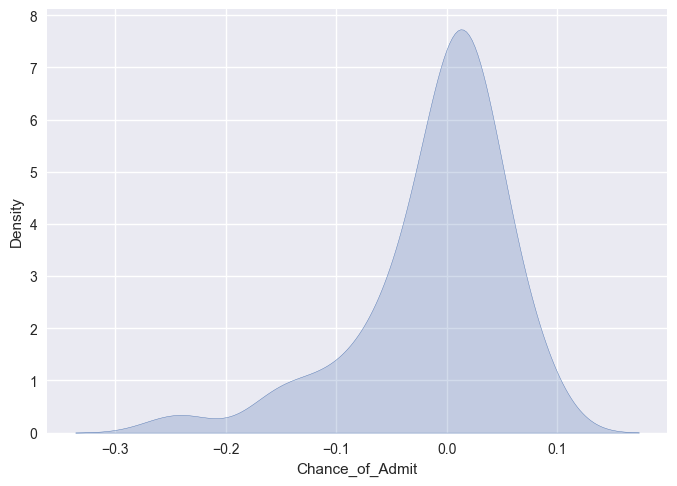

In [107]:
sns.kdeplot(residual,fill=True)

<AxesSubplot: xlabel='Chance_of_Admit', ylabel='Count'>

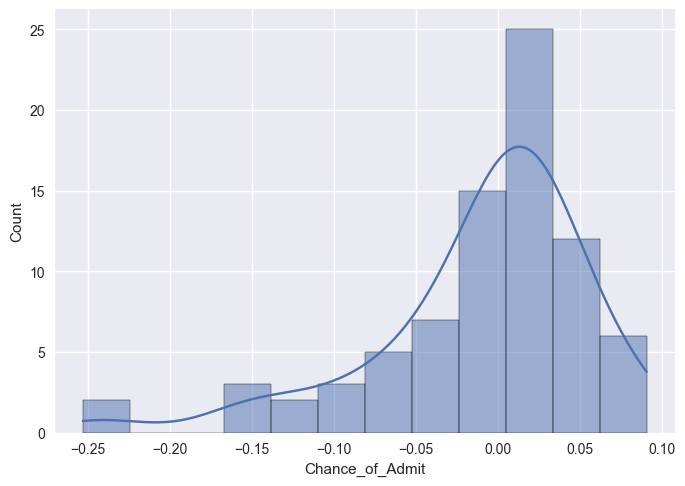

In [108]:
sns.histplot(residual,kde=True)

### QQ-Plot

In [68]:
import statsmodels.api as sm

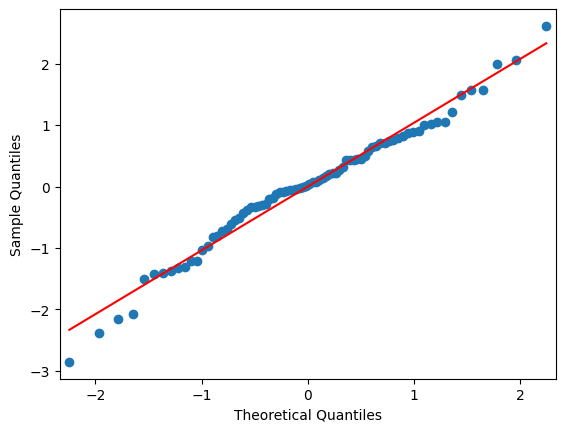

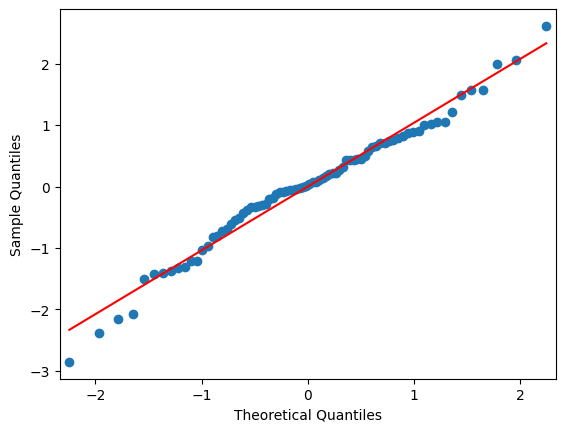

In [69]:
sm.qqplot(residual,line='r',fit=True)

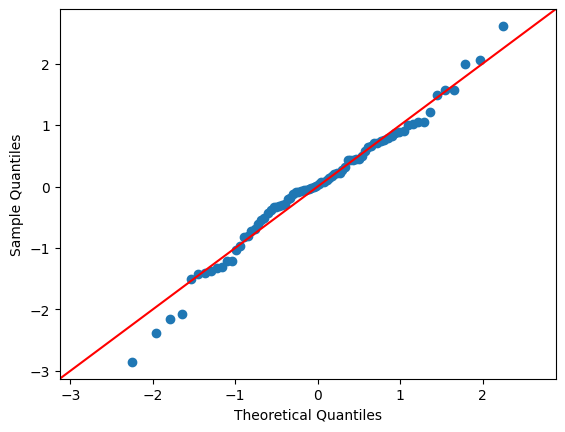

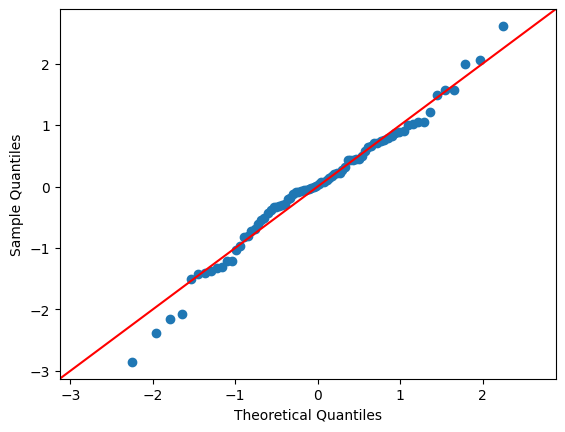

In [70]:
sm.qqplot(residual,line='45',fit=True)

### Skewness

In [71]:
residual.skew()

-0.2868533808897205

In [72]:
import statsmodels.api as sm

### Evaluation on Testing Data

In [109]:
mse= mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error :',mse)

rmse= np.sqrt(mse)
print('Root Mean Squared Error: ',rmse)

mae=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ',mae)

r_sqr=r2_score(y_test,y_pred_test)
print('R2_Score :',r_sqr)

r2_adj=1-(((1-r_sqr)*(x_test.shape[0]-1))/(x_test.shape[0]- x_test.shape[1]-1))
print('Adjusted R2_Score: ',r2_adj)

Mean Squared Error : 0.004481013102749553
Root Mean Squared Error:  0.06694036975360647
Mean Absolute Error:  0.04596750641501285
R2_Score : 0.8062468830474819
Adjusted R2_Score:  0.7903219693253571


### Evaluation on Traning Data

In [110]:
y_pred_train = lin_reg.predict(x_train)
y_pred_train

array([0.56099322, 0.95856022, 0.72400482, 0.6272572 , 0.64477321,
       0.6272481 , 0.73412955, 0.96598999, 0.72580226, 0.72870471,
       0.53983593, 0.66359354, 0.77422564, 0.78320611, 0.50880098,
       0.60915298, 0.7010368 , 0.76871599, 0.82242167, 0.85847814,
       0.84668818, 0.52334918, 0.64256902, 0.50805599, 0.75283608,
       0.83492888, 0.78990074, 0.61145346, 0.86636153, 0.69943812,
       0.78444869, 0.48538366, 0.89162963, 0.72142677, 0.6856657 ,
       0.54215744, 0.68712277, 0.79167397, 0.72415253, 0.80081448,
       0.59133012, 0.65885168, 0.63220431, 0.73873699, 0.77849998,
       0.63386231, 0.94908504, 0.8503091 , 0.71371445, 0.92645919,
       0.72762703, 0.61131421, 0.63070076, 0.85009474, 0.56280858,
       0.67305387, 0.66402077, 0.7299034 , 0.67635175, 0.47677455,
       0.62436049, 0.71285168, 0.66536581, 0.80386159, 0.76654977,
       0.61169367, 0.6623684 , 0.72984813, 0.85037584, 0.72447719,
       0.74918824, 0.94937814, 0.77368832, 0.85514672, 0.83407

In [117]:
mse=mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :', mse)

rmse=np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error:',mae)

r_sqrd=r2_score(y_train,y_pred_train)
print('R2_Score :',r_sqrd)

r2_adj=1-(((1-r_sqr)*(x_test.shape[0]-1))/(x_test.shape[0]- x_test.shape[1]-1))
print('Adjusted R2_Score: ',r2_adj)

Mean Squared Error : 0.004002092399800638
Root Mean Squared Error: 0.06326209291353424
Mean Absolute Error: 0.04535963575676781
R2_Score : 0.7954004232140319
Adjusted R2_Score:  0.7903219693253571


### Future value prediction

In [114]:
lin_reg.predict([[300,104,2,3.14,4.5,8.4]])  

array([0.67351379])

In [115]:
lin_reg.predict([[250,110,3,5,4.1,9]])

array([0.65265045])

In [116]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [81]:
linear_reg.fit(Xs.values.reshape(-1,1), y_train)

LinearRegression()

In [80]:
Xs= x_train['Chance_of_Admit']
Ys =y_train
Xs

93     0.44
23     0.95
299    0.71
13     0.62
90     0.64
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance_of_Admit, Length: 320, dtype: float64

In [ ]:
# Ys

In [82]:
Xavg = Xs.mean()
Yavg = Ys.mean()
print(Xavg)
print(Yavg)

0.726125
8.59934375


In [119]:
with open('Linear Model.pkl','wb') as f:
    pickle.dump(lin_reg,f)

In [83]:
from matplotlib import style


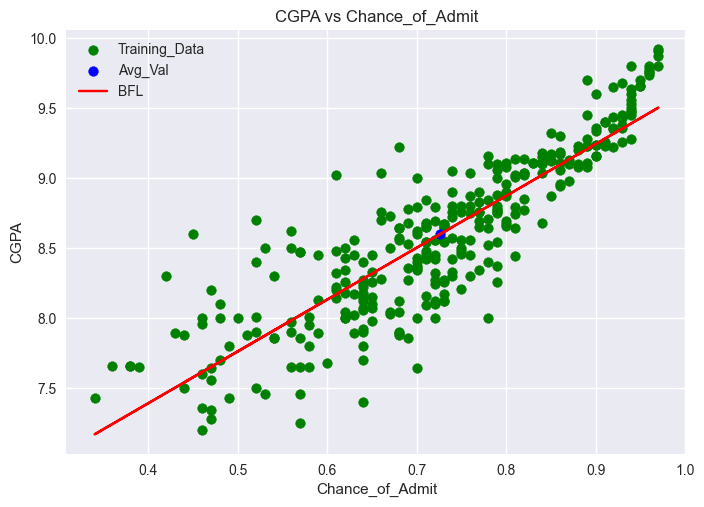

In [84]:
style.use('seaborn')
plt.scatter(Xs,Ys,c='green')
plt.scatter(Xavg,Yavg,c='blue')
plt.plot(Xs.values.reshape(-1,1),linear_reg.predict(Xs.values.reshape(-1,1)),color='red')
plt.title('CGPA vs Chance_of_Admit')
plt.xlabel('Chance_of_Admit')
plt.ylabel('CGPA')
plt.legend(['Training_Data','Avg_Val','BFL'])
plt.show()

In [ ]:

# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.
# reshape(1, -1) if it contains a single sample.

In [118]:
import pickle
import numpy as np